In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
k = np.zeros((5, 5, 6))

indices = ([0, 0, 1], [0, 1, 0])
k[indices] = 1
k[(1,2,3)] = 1

# k[0, 1] = 1
# k[0, 0] = 1
# k[1, 0] = 1

k.nonzero()

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
       dtype=int64),
 array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2],
       dtype=int64),
 array([0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 3],
       dtype=int64))

In [3]:
k

array([[[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]],

       [[1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]]])

In [4]:
k[(1,2,3)]

1.0

In [5]:
print('\u2192')

→


In [6]:
UP = np.array([-1, 0])
DOWN = np.array([1, 0])
LEFT = np.array([0, -1])
RIGHT = np.array([0, 1])

MOVING_ACTIONS = np.array([LEFT, UP, RIGHT, DOWN])
ACTION_PRINT = ['\u2190', '\u2191', '\u2192', '\u2193']

GRID_EMPTY = 0
GRID_WALL = 1
GRID_PRIZE = 8

FOUR_ROOM = ([0, 2, 2, 2, 2, 4], [2, 0, 1, 3, 4, 2])
# ((0, 2), (2, 0), (2, 1), (2, 3), (2, 4), (4, 2))
MAZE = ([1, 1, 1, 2, 3, 4, 4, 4, 4], [1, 2, 3, 3, 1, 1, 2, 3, 4,])
# ((1, 1), (1, 2), (1, 3), (2, 3), (3, 1), (4, 1), (4, 2), (4, 3), (4, 4))
EMPTY = None

class Grid():
    def __init__(self, maze_type):
        self.grid = np.zeros((5,5))
        self.position = np.array([2,2])
        if maze_type != EMPTY:
            self.grid[maze_type] = GRID_WALL
        self.prize_location = self.__random_init_prize()

    def __random_init_prize(self):
        prize_location_choices = [(i, j) for i in range(5) for j in range(5) if self.grid[i, j] == GRID_EMPTY and (i, j) != (2, 2)]
        prize_idx = np.random.randint(len(prize_location_choices))
        self.grid[prize_location_choices[prize_idx]] = GRID_PRIZE
        return tuple(prize_location_choices[prize_idx])

    def move(self, direction):
        self.position += direction
        if (self.position >= 5).any() or (self.position < 0).any() or self.grid[tuple(self.position)] == GRID_WALL:
            self.position -= direction
            return 0, self.position

        if self.grid[tuple(self.position)] == GRID_PRIZE:
            return 1, self.position
        
        return 0, self.position
    
    def print_grid(self):
        for i in range(5):
            for j in range(5):
                if self.grid[i, j] == GRID_WALL:
                    print('#', end=' ')
                elif self.grid[i, j] == GRID_PRIZE:
                    print('P', end=' ')
                elif i == self.position[0] and j == self.position[1]:
                    print('*', end=' ')
                else:
                    print('O', end=' ')
            print()
    
    def restart(self):
        self.position = np.array([2,2])
        self.grid[self.prize_location] = GRID_EMPTY
        self.prize_location = self.__random_init_prize()

In [80]:
g = Grid(EMPTY)
appearance = np.zeros((5,5))
for _ in range(240000):
    g.restart()
    appearance[g.prize_location] += 1
    appearance[tuple(g.position)] += 1

print(appearance)
    

[[  9936.  10015.   9973.  10157.  10065.]
 [  9824.  10014.  10181.  10020.  10054.]
 [ 10076.  10000. 240000.  10068.  10211.]
 [  9943.  10018.   9993.   9916.   9844.]
 [  9917.   9872.   9895.  10037.   9971.]]


In [11]:
pos = np.array([3,2])
if (pos > 2).any():
    print("True")

True


In [12]:
g = Grid(FOUR_ROOM)
g.print_grid()
print()
instructions = [UP, DOWN, LEFT, RIGHT, DOWN, LEFT, RIGHT]
for i in instructions:
    print(g.move(i))
    g.print_grid()
    print()

O O # O O 
O O O O O 
# # * # # 
O O O O O 
O O # P O 

(0, array([1, 2]))
O O # O O 
O O * O O 
# # O # # 
O O O O O 
O O # P O 

(0, array([2, 2]))
O O # O O 
O O O O O 
# # * # # 
O O O O O 
O O # P O 

(0, array([2, 2]))
O O # O O 
O O O O O 
# # * # # 
O O O O O 
O O # P O 

(0, array([2, 2]))
O O # O O 
O O O O O 
# # * # # 
O O O O O 
O O # P O 

(0, array([3, 2]))
O O # O O 
O O O O O 
# # O # # 
O O * O O 
O O # P O 

(0, array([3, 1]))
O O # O O 
O O O O O 
# # O # # 
O * O O O 
O O # P O 

(0, array([3, 2]))
O O # O O 
O O O O O 
# # O # # 
O O * O O 
O O # P O 



In [13]:
Q = np.zeros((5, 5, 4, 4))
Q[2,2,3,2] = 1
Q[2,2,3,1] = 2
Q[2,2,3,0] = 3

np.argmax(Q[(2,2,3)])

0

In [14]:
NUM_SYMBOLS = 25
DISCOUNT = 0.95
TERMINATION_PROB = 0.05


class Receiver():
    def __init__(self, grid, num_symbols):
        self.grid = grid
        self.Q = np.zeros((5, 5, num_symbols, len(MOVING_ACTIONS)))
        self.current_state = (2, 2, -1)
        
    def start_learning(self, message, learning_rate, eps):
        self.current_state = (self.grid.position[0], self.grid.position[1], message)
        count = 0
        while True:
            action_idx = self.select_action(eps)
            reward, new_position = self.grid.move(MOVING_ACTIONS[action_idx])
            new_state = (new_position[0], new_position[1], message)
            if reward == 1:
                self.Q[self.current_state][action_idx] = (1 - learning_rate) * self.Q[self.current_state][action_idx] + learning_rate * reward
            else:
                self.Q[self.current_state][action_idx] = (1 - learning_rate) * self.Q[self.current_state][action_idx] + learning_rate * DISCOUNT * np.max(self.Q[new_state])
            self.current_state = new_state
            count += 1
            # termination condition
            if np.random.random() < TERMINATION_PROB or reward == 1:
                return reward, np.power(DISCOUNT, count) * reward

    def select_action(self, eps):
        # Eps: probability to explore
        if np.random.random() < eps:
            return np.random.randint(len(MOVING_ACTIONS))
        else:
            # return np.random.choice(np.flatnonzero(self.Q[self.current_state] == self.Q[self.current_state].max()))
            return np.argmax(self.Q[self.current_state])
    
    def print_action(self):
        print("\t a \t b \t c \t d \t e")
        for msg in range(NUM_SYMBOLS):
            print(f"Actions for message {msg}")
            q = self.Q[:,:,msg]
            for i, row in enumerate(q):
                print(f"{i} \t", end='')
                for action_idx in row:
                    print(f"{ACTION_PRINT[action_idx]} \t", end='')
                print()

class Sender():
    def __init__(self, grid, num_symbols):
        self.grid = grid
        self.Q = np.zeros((5, 5, num_symbols))
        self.num_symbols = num_symbols
        self.receiver = Receiver(grid, num_symbols)

    def start_learning(self, eps, N_episodes):
        self.grid.restart()
        self.current_state = self.grid.prize_location
        learning_rate = 0.9
        received_reward = 0
        for i in range(N_episodes):
            action_message = self.select_action(eps)
            reward, receiver_discounted_reward = self.receiver.start_learning(action_message, learning_rate, eps)
            # print(reward)
            # self.grid.print_grid()
            self.grid.restart()
            new_state = self.grid.prize_location
            self.Q[self.current_state][action_message] = (1 - learning_rate) * self.Q[self.current_state][action_message] + learning_rate * reward
            self.current_state = new_state
            learning_rate -= (0.9 - 0.01) / N_episodes
            received_reward += receiver_discounted_reward
            
        return received_reward / N_episodes

    def select_action(self, eps):
        # Eps: probability to explore
        if np.random.random() < eps:
            return np.random.randint(self.num_symbols)
        else:
            # return np.random.choice(np.flatnonzero(self.Q[self.current_state] == self.Q[self.current_state].max()))
            return np.argmax(self.Q[self.current_state])

In [19]:


rewards = []
senders = []
for i in tqdm(range(10)):
    g = Grid(FOUR_ROOM)
    sender = Sender(g, 4)
    sender.start_learning(0.1, 50000)
    rewards.append(sender.start_learning(0, 1000))
    senders.append(sender)

print(np.mean(rewards))
print(np.std(rewards))



100%|██████████| 10/10 [00:53<00:00,  5.40s/it]

0.75600670612254
0.011031296735956706


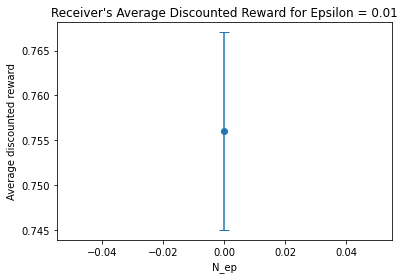

In [20]:
plt.errorbar(0, np.mean(rewards), yerr=np.std(rewards), fmt='o', capsize=5)
plt.ylabel("Average discounted reward")
plt.xlabel("N_ep")
plt.title(f"Receiver's Average Discounted Reward for Epsilon = {eps}")
plt.savefig(f"Receiver's Average Discounted Reward for Epsilon = {eps}.png")
plt.show()

In [ ]:
NEPs = [10, 1000, 50000]
EPSs = [0.1, 0.4]

rewards_10 = np.zeros((10, len(EPSs), len(NEPs)))
senders_10 = [[[None for _ in NEPs] for _ in EPSs] for _ in range(10)]
for i in tqdm(range(10)):
    for e_idx, eps in enumerate(EPSs):
        for n_idx, n_episodes in enumerate(NEPs):
            g = Grid(FOUR_ROOM)
            sender = Sender(g, 4)
            sender.start_learning(eps, n_episodes)
            rewards_10[i, e_idx, n_idx] = sender.start_learning(0, 1000)
            senders_10[i][e_idx][n_idx] = sender
            print(f"eps = {eps}, n_episodes = {n_episodes}, reward = {rewards_10[i, e_idx, n_idx]}")

In [32]:
print(rewards_10[:,0,-1])

[0.75634671 0.755128   0.77014688 0.7610679  0.75280782 0.75298989
 0.76259108 0.74529449 0.74879554 0.75744699]


In [33]:
print(rewards_10[:,1,-1])

[0.4975768  0.76243536 0.703226   0.69775753 0.67791438 0.68372002
 0.48816167 0.68425733 0.72446163 0.76304965]


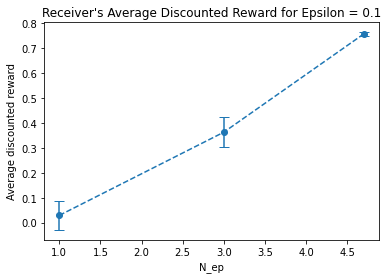

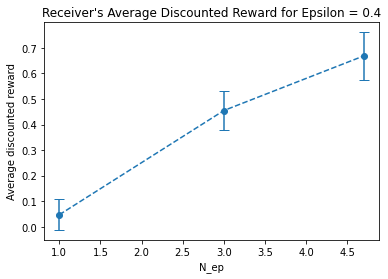

In [39]:
y = np.mean(rewards_10, axis=0)
err = np.std(rewards_10, axis=0)
# plt.errorbar(x, [y, y_before_EM], yerr=[err, err_before_EM], fmt='o')
for i, eps in enumerate(EPSs):
    plt.errorbar(np.log10(NEPs), y[i], yerr=err[i], fmt='o', capsize=5, linestyle='-')
    plt.ylabel("Average discounted reward")
    plt.xlabel("N_ep")
    plt.title(f"Receiver's Average Discounted Reward for Epsilon = {eps}")
    plt.savefig(f"Receiver's Average Discounted Reward for Epsilon = {eps}.png")
    plt.show()

In [41]:
NEPs = [10, 100, 1000, 10000, 50000, 100000]
EPSs = [0.01, 0.1, 0.4]

rewards_10 = np.zeros((10, len(EPSs), len(NEPs)))
senders_10 = [[[None for _ in NEPs] for _ in EPSs] for _ in range(10)]
for i in tqdm(range(10)):
    for e_idx, eps in enumerate(EPSs):
        for n_idx, n_episodes in enumerate(NEPs):
            g = Grid(FOUR_ROOM)
            sender = Sender(g, 4)
            sender.start_learning(eps, n_episodes)
            rewards_10[i, e_idx, n_idx] = sender.start_learning(0, 1000)
            senders_10[i][e_idx][n_idx] = sender

100%|██████████| 10/10 [15:54<00:00, 95.44s/it]


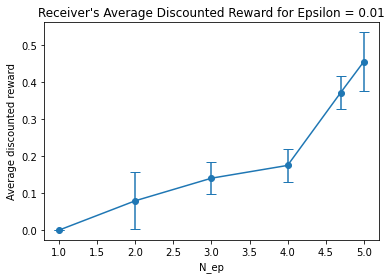

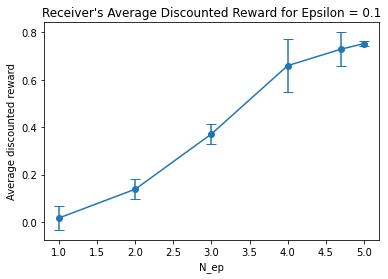

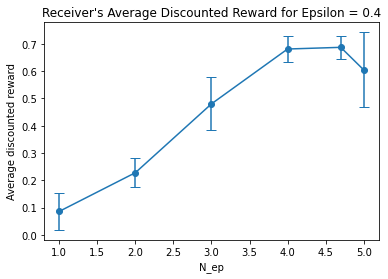

In [42]:
y = np.mean(rewards_10, axis=0)
err = np.std(rewards_10, axis=0)
# plt.errorbar(x, [y, y_before_EM], yerr=[err, err_before_EM], fmt='o')
for i, eps in enumerate(EPSs):
    plt.errorbar(np.log10(NEPs), y[i], yerr=err[i], fmt='o', capsize=5, linestyle='-')
    plt.ylabel("Average discounted reward")
    plt.xlabel("N_ep")
    plt.title(f"Receiver's Average Discounted Reward for Epsilon = {eps}")
    plt.savefig(f"Receiver's Average Discounted Reward for Epsilon = {eps}.png")
    plt.show()

In [163]:
from multiprocessing import Pool

def one_test():
    NEPs = [10, 100, 1000, 10000, 50000, 100000]
    EPSs = [0.01, 0.1, 0.4]

    rewards = np.zeros((len(EPSs), len(NEPs)))
    senders = [[None for _ in NEPs] for _ in EPSs]
    for e_idx, eps in enumerate(EPSs):
        for n_idx, n_episodes in enumerate(NEPs):
            g = Grid(FOUR_ROOM)
            sender = Sender(g, 4)
            sender.start_learning(eps, n_episodes)
            rewards[i, e_idx, n_idx] = sender.start_learning(0, 1000)
            senders[i][e_idx][n_idx] = sender
    return rewards, senders

In [164]:
results = [None for _ in range(10)]

with Pool() as pool:
    results = pool.map(one_test, range(10))

In [162]:
print(np.argmax(senders[0][1][-1].Q, axis=2))

[[1 1 0 0 0]
 [1 1 0 0 0]
 [0 0 0 0 0]
 [3 3 3 2 2]
 [3 3 0 2 2]]


In [147]:
print(np.argmax(senders[4].Q, axis=2))

[[3 3 0 2 2]
 [3 3 3 2 2]
 [0 0 0 0 0]
 [1 1 1 0 0]
 [1 1 0 0 0]]


In [148]:
print(np.argmax(senders[4].receiver.Q, axis=3)[:,:,0])

[[3 0 0 3 1]
 [2 2 3 0 0]
 [0 0 3 0 0]
 [2 2 2 2 3]
 [2 1 0 2 0]]


In [28]:
a = np.log(0)
b = np.log(1)
c = np.log(2)

logsumexp([a, b, c]) - np.log10

C:\Users\KandaMaya\AppData\Local\Temp\ipykernel_14816\2616776624.py:1: RuntimeWarning: divide by zero encountered in log
  a = np.log(0)


1.0986122886681096

In [55]:
k = np.array([0,0,-1,0,0,0])
np.argmax(k)

0

In [56]:
np.random.choice(np.flatnonzero(k == k.max()))

4

In [57]:
k == k.max()

array([ True,  True, False,  True,  True,  True])

In [58]:
np.flatnonzero(k == k.max())

array([0, 1, 3, 4, 5], dtype=int64)

In [7]:
DISCOUNT = 0.95
TERMINATION_PROB = 0.05

class Receiver():
    def __init__(self, grid, num_symbols):
        self.grid = grid
        self.Q = np.zeros((5, 5, num_symbols, len(MOVING_ACTIONS)))
        self.current_state = (2, 2, -1)
        self.num_symbols = num_symbols
        
    def start_learning(self, message, learning_rate, eps):
        # When start learning, the current state is the starting position of the grid. We let Sender to reset the grid.
        self.current_state = (self.grid.position[0], self.grid.position[1], message)
        while True:
            action_idx = self.select_action(eps)
            reward, new_position = self.grid.move(MOVING_ACTIONS[action_idx])
            new_state = (new_position[0], new_position[1], message)
            if reward == 1:
                # No future reward in this case as we terminate the episode
                self.Q[self.current_state][action_idx] = (1 - learning_rate) * self.Q[self.current_state][action_idx] + learning_rate * reward
            else:
                self.Q[self.current_state][action_idx] = (1 - learning_rate) * self.Q[self.current_state][action_idx] + learning_rate * DISCOUNT * np.max(self.Q[new_state])
            self.current_state = new_state
            # termination condition
            if np.random.uniform(0, 1) < TERMINATION_PROB or reward == 1:
                return reward
    
    def test(self, message):
        self.current_state = (self.grid.position[0], self.grid.position[1], message)
        count = 0
        while True:
            # we only exploit the best action
            action_idx = self.select_action(0)
            reward, new_position = self.grid.move(MOVING_ACTIONS[action_idx])
            self.current_state = (new_position[0], new_position[1], message)
            count += 1
            if np.random.uniform(0, 1) < TERMINATION_PROB or reward == 1:
                return reward, np.power(DISCOUNT, count) * reward

    def select_action(self, eps):
        # Eps: probability to explore
        if np.random.uniform(0, 1) < eps:
            return np.random.randint(len(MOVING_ACTIONS))
        else:
            # random tie breaking. useful for all zero position (in initialization)
            return np.random.choice(np.flatnonzero(self.Q[self.current_state] == self.Q[self.current_state].max()))
    
    def print_action(self):
        for msg in range(self.num_symbols):
            print(f"Actions for message {msg}")
            print("\ta\tb\tc\td\te")
            q = self.Q[:,:,msg,:]
            for i, row in enumerate(q):
                print(f"{i} \t", end='')
                for j, col in enumerate(row):
                    assert col.shape == (4,)
                    if self.grid.grid[i, j] == GRID_WALL:
                        print(" \t", end='')
                    else:
                        idx = np.argmax(col)
                        print(f"{ACTION_PRINT[idx]} \t", end='')
                print()

class Sender():
    def __init__(self, grid, num_symbols):
        self.grid = grid
        self.Q = np.zeros((5, 5, num_symbols))
        self.num_symbols = num_symbols
        self.receiver = Receiver(grid, num_symbols)

    def start_learning(self, eps, N_episodes):
        learning_rate = 0.9
        for i in range(N_episodes):
            # reset the grid for each episode
            self.grid.restart()
            self.current_state = self.grid.prize_location
            action_message = self.select_action(eps)
            # Inner loop for receiver
            reward = self.receiver.start_learning(action_message, learning_rate, eps)
            # No future reward and state change because it does not make sense. The state of sender is random (prize location), nothing to do with its action. Absorbing state
            self.Q[self.current_state][action_message] = (1 - learning_rate) * self.Q[self.current_state][action_message] + learning_rate * reward
            learning_rate -= (0.9 - 0.01) / N_episodes
    
    def test(self, N_episodes):
        received_reward = 0
        for i in range(N_episodes):
            self.grid.restart()
            self.current_state = self.grid.prize_location
            action_message = self.select_action(0)
            # Inner loop for receiver, get the dicounted reward
            reward, receiver_discounted_reward = self.receiver.test(action_message)
            received_reward += receiver_discounted_reward
            
        return received_reward / N_episodes

    def select_action(self, eps):
        # Eps: probability to explore
        if np.random.uniform(0, 1) < eps:
            return np.random.randint(self.num_symbols)
        else:
            # random tie breaking. Useful for eps small
            return np.random.choice(np.flatnonzero(self.Q[self.current_state] == self.Q[self.current_state].max()))

In [8]:
s = Sender(Grid(FOUR_ROOM), 4)
s.start_learning(0.1, 100000)
s.receiver.print_action()

KeyboardInterrupt: 

In [ ]:
print(np.argmax(s.Q, axis=2))

[[0 0 0 3 3]
 [0 0 3 3 3]
 [0 0 0 0 0]
 [1 1 1 2 2]
 [1 1 0 2 2]]


In [9]:
s2 = Sender(Grid(EMPTY), 1)
s2.start_learning(0.1, 1000000)
s2.test(1000)

0.2907302463849985